### MACHINE LEARNING TASK WITH CLASSIFICATION MODELS.
- RANDOM FOREST CLASSIFIER
- LOGISTIC REGRESSION
- DECISION TREE CLASSIFIER

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [15]:
filename = 'heart.csv'

df = pd.read_csv(filename)

In [16]:
features = df.columns[:-1].tolist()

In [17]:
dir(df)

['AGE_50',
 'CHOL_50',
 'CHOL_62',
 'CL_STATUS',
 'DBP_50',
 'DBP_62',
 'DEATH',
 'HT_50',
 'IHD_DX',
 'MD_50',
 'MD_62',
 'SBP_50',
 'SBP_62',
 'SES',
 'T',
 'WT_50',
 'WT_62',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '_

In [18]:
df.head()

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,42,1,110,65,64,147,291,2,8,4,120,78,271,146,2,1
1,53,1,130,72,69,167,278,1,6,2,122,68,250,165,9,1
2,53,2,120,90,70,222,342,4,8,1,132,90,304,223,2,1
3,48,4,120,80,72,229,239,4,8,2,118,68,209,227,3,1
4,53,3,118,74,66,134,243,3,8,5,118,56,261,138,2,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   AGE_50     200 non-null    int64
 1   MD_50      200 non-null    int64
 2   SBP_50     200 non-null    int64
 3   DBP_50     200 non-null    int64
 4   HT_50      200 non-null    int64
 5   WT_50      200 non-null    int64
 6   CHOL_50    200 non-null    int64
 7   SES        200 non-null    int64
 8   CL_STATUS  200 non-null    int64
 9   MD_62      200 non-null    int64
 10  SBP_62     200 non-null    int64
 11  DBP_62     200 non-null    int64
 12  CHOL_62    200 non-null    int64
 13  WT_62      200 non-null    int64
 14  IHD_DX     200 non-null    int64
 15  DEATH      200 non-null    int64
dtypes: int64(16)
memory usage: 25.1 KB


In [20]:
df.describe()

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
count,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,46.06500,2.360000,124.700000,83.380000,68.160000,168.075000,258.105000,2.915000,7.650000,2.315000,141.480000,84.820000,254.070000,167.375000,1.410000,0.320000
std,10.81274,1.017633,18.114654,11.000484,2.768161,26.639589,55.524126,1.069342,1.119718,1.197055,24.656833,12.808116,46.509686,27.516178,2.464196,0.467647
min,20.00000,1.000000,88.000000,38.000000,61.000000,109.000000,120.000000,1.000000,0.000000,1.000000,70.000000,56.000000,139.000000,108.000000,0.000000,0.000000
25%,38.00000,1.000000,110.000000,78.000000,66.000000,147.000000,220.000000,2.000000,8.000000,1.000000,125.000000,76.000000,222.750000,148.750000,0.000000,0.000000
50%,47.00000,2.000000,120.000000,80.000000,68.000000,165.000000,250.000000,3.000000,8.000000,2.000000,138.000000,83.000000,251.500000,165.500000,0.000000,0.000000
75%,54.00000,3.000000,130.000000,90.000000,70.000000,189.000000,295.000000,3.000000,8.000000,3.000000,155.000000,90.000000,283.250000,187.000000,2.000000,1.000000
max,69.00000,4.000000,210.000000,140.000000,75.000000,245.000000,535.000000,5.000000,8.000000,5.000000,230.000000,125.000000,368.000000,246.000000,9.000000,1.000000


In [21]:
df.isna().sum()

AGE_50       0
MD_50        0
SBP_50       0
DBP_50       0
HT_50        0
WT_50        0
CHOL_50      0
SES          0
CL_STATUS    0
MD_62        0
SBP_62       0
DBP_62       0
CHOL_62      0
WT_62        0
IHD_DX       0
DEATH        0
dtype: int64

In [12]:
df.Type.value_counts()


AttributeError: 'DataFrame' object has no attribute 'Type'

## Data Visualization
- Univariate plots
- Multivariate plots

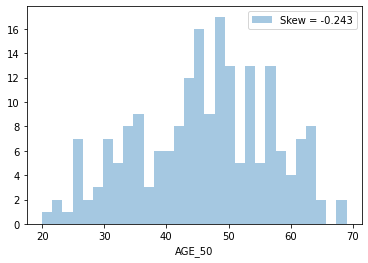

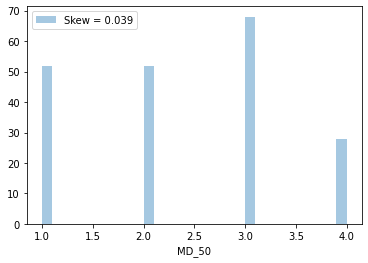

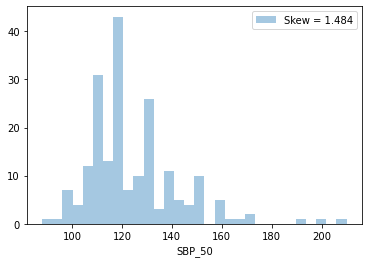

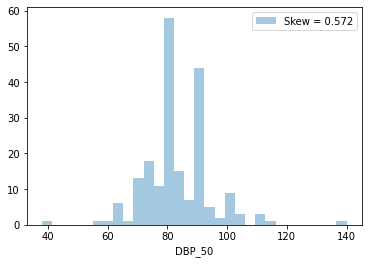

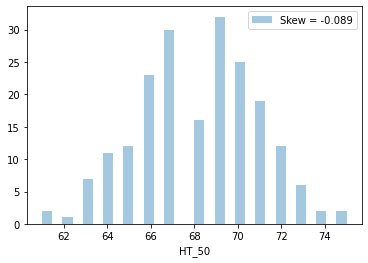

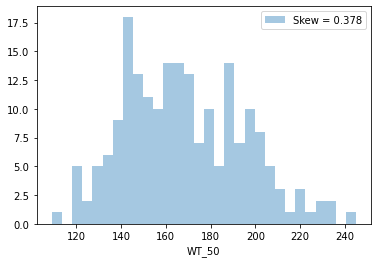

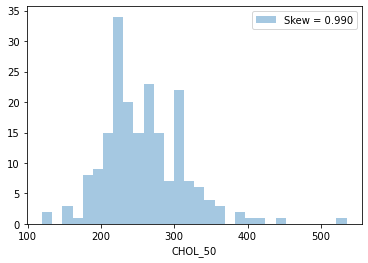

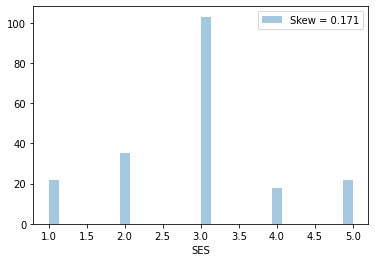

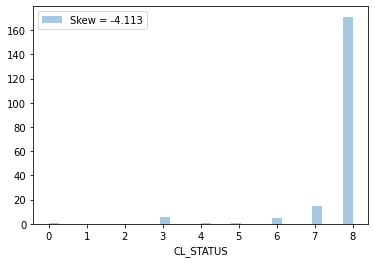

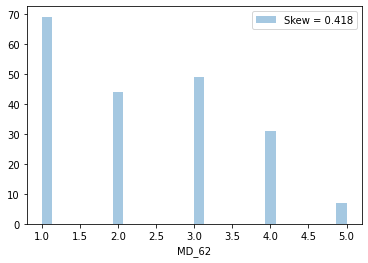

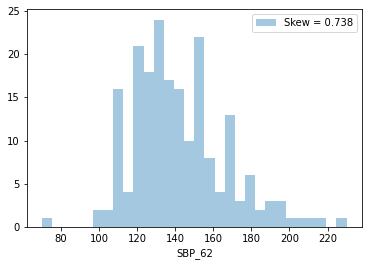

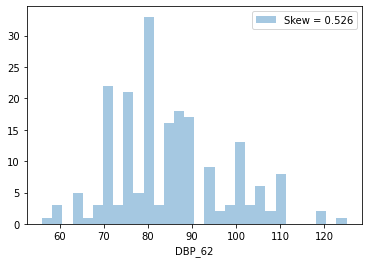

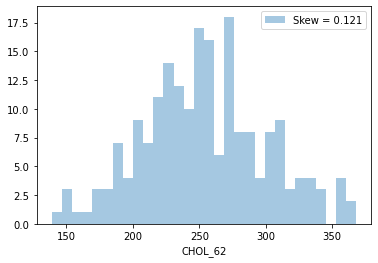

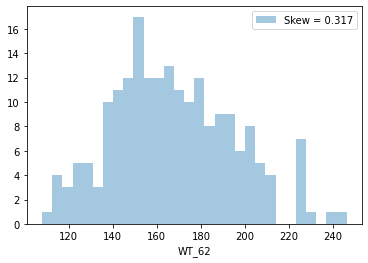

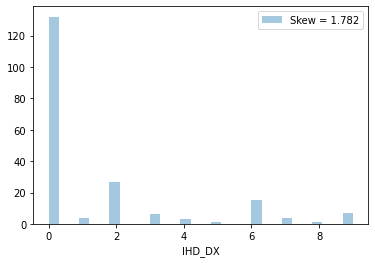

In [23]:
for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde=False, label='Skew = %.3f' % (skew), bins=30)
    plt.legend(loc='best')
    plt.show()

<Figure size 720x720 with 0 Axes>

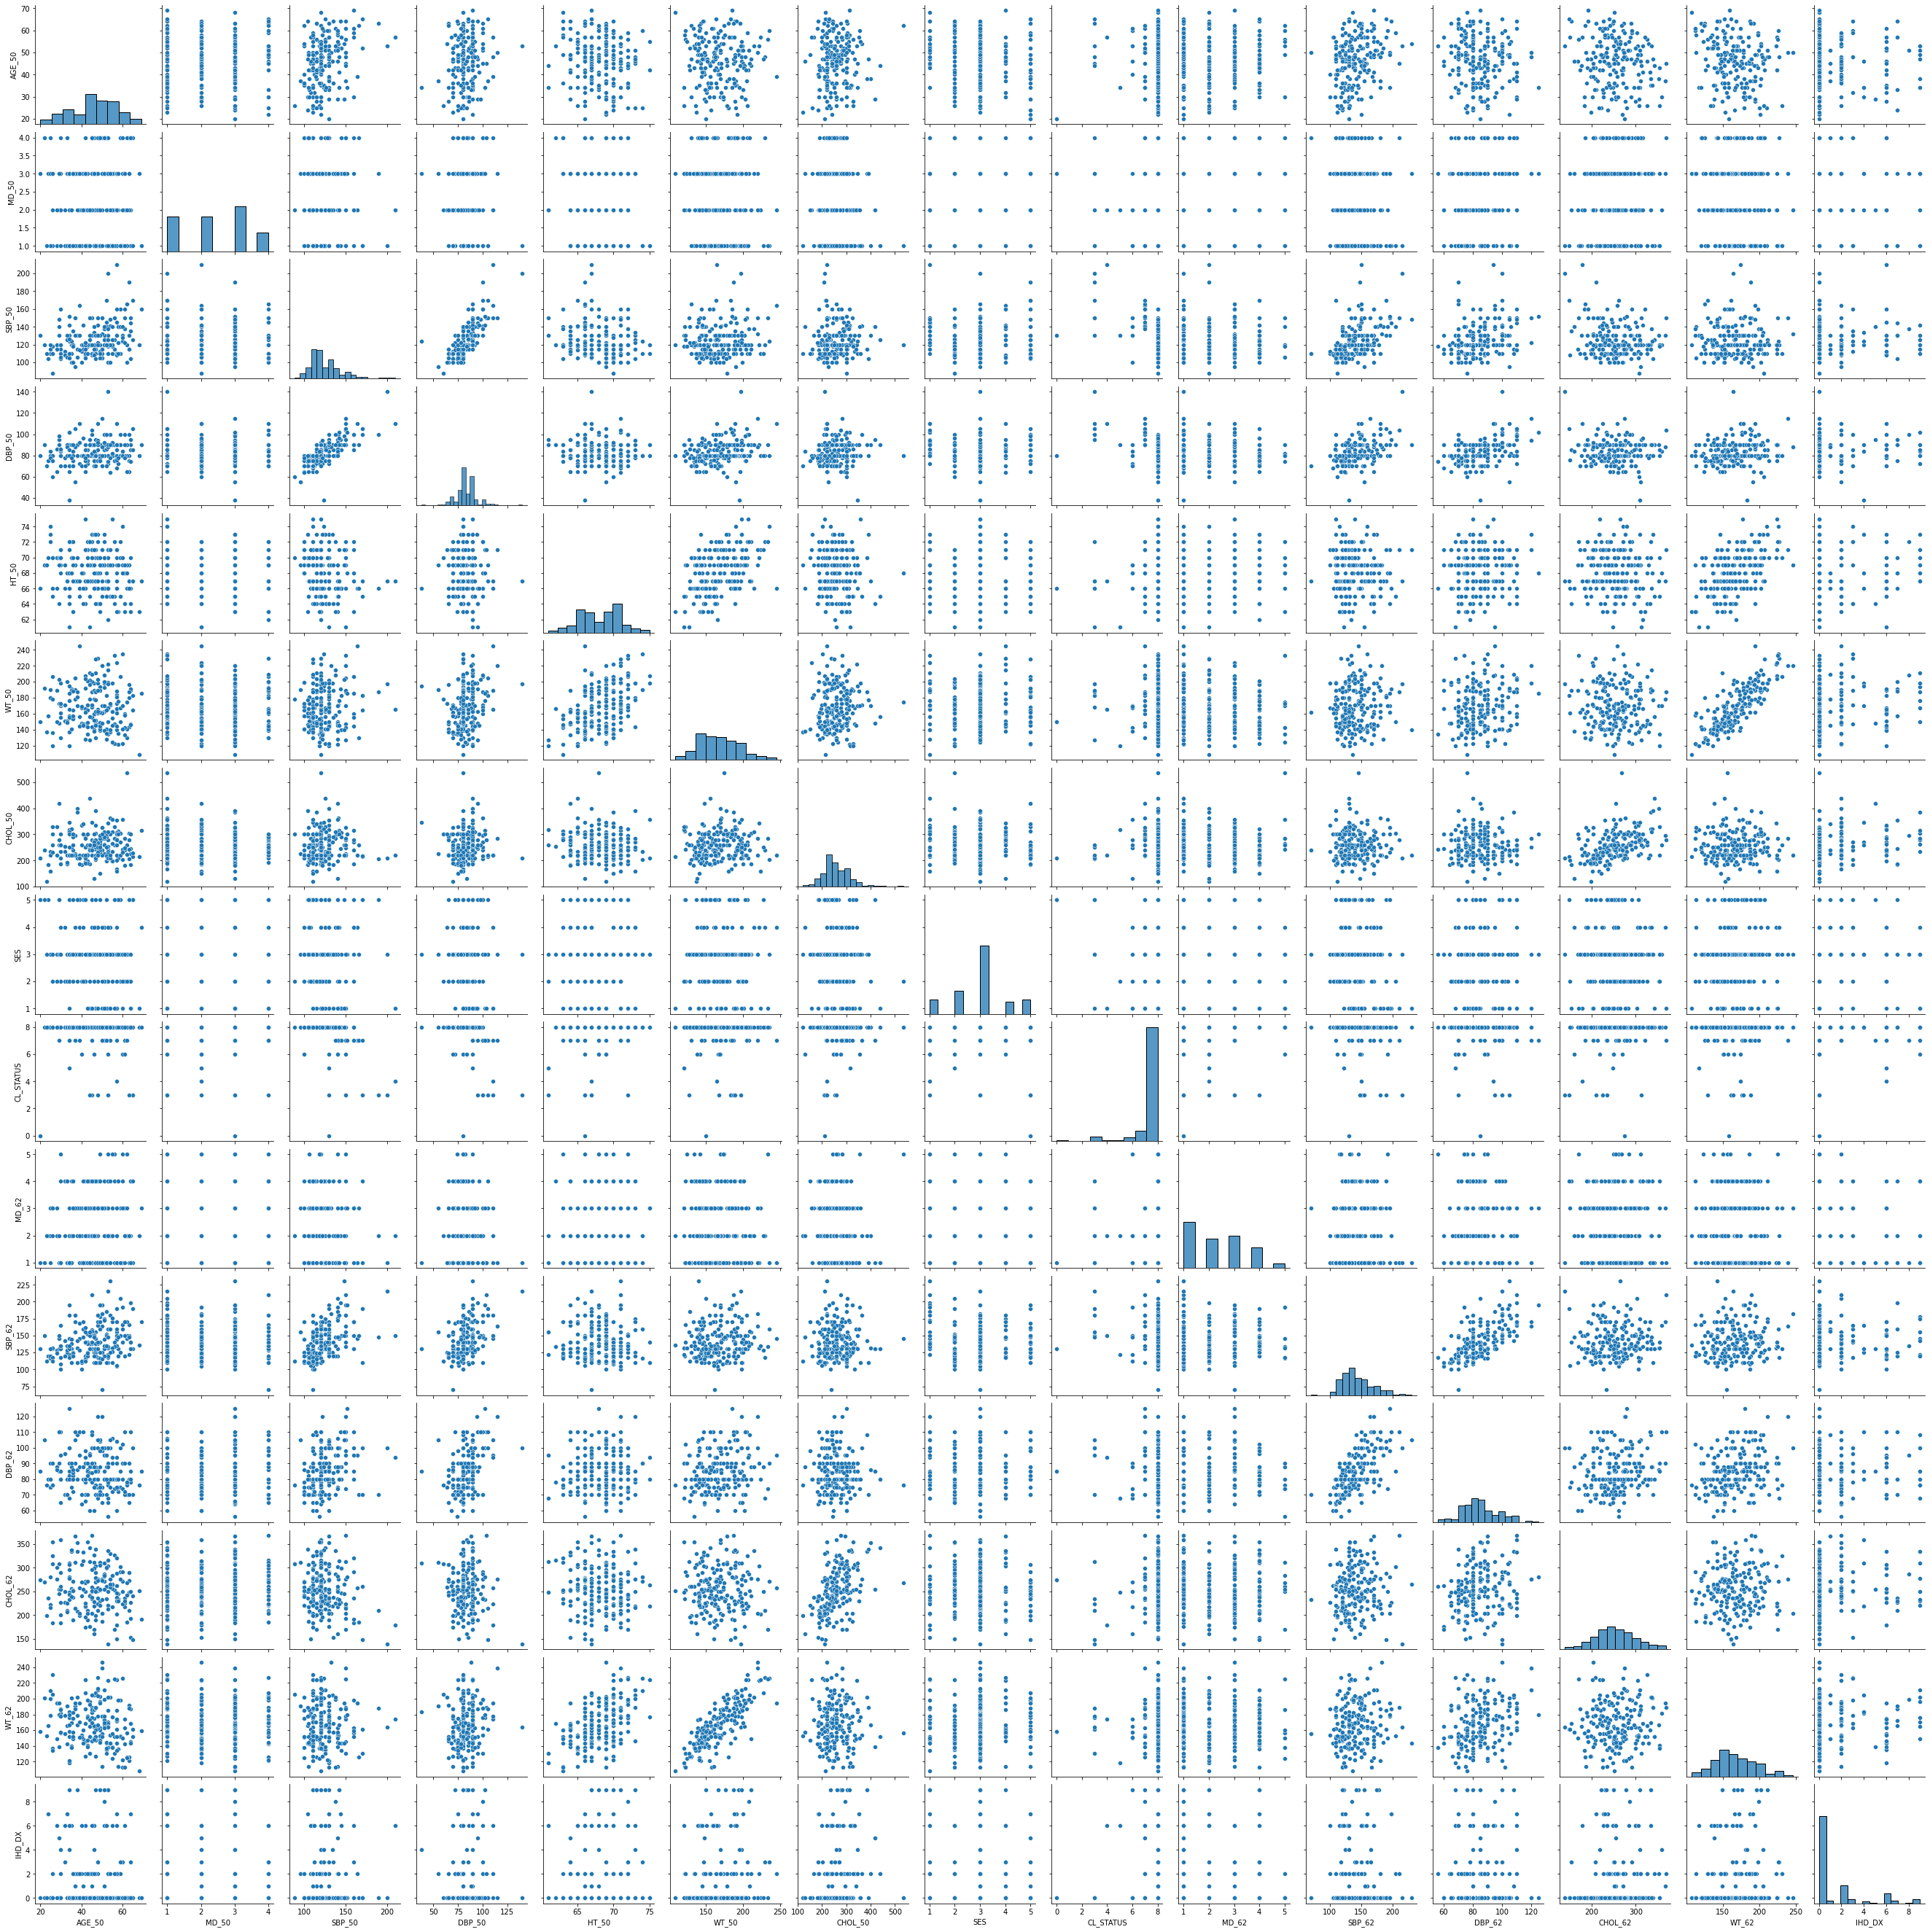

In [24]:
# Lets check out the pairplot
plt.figure(figsize=(10,10))
sns.pairplot(df[features])
plt.show()

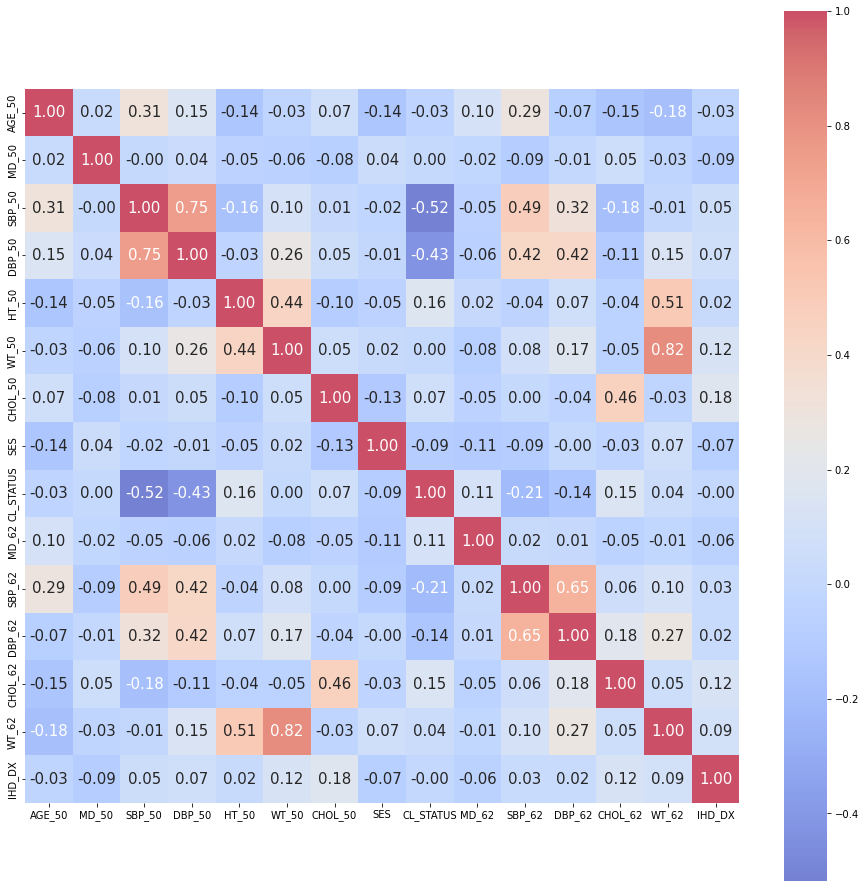

In [25]:
plt.figure(figsize=(16,16))
sns.heatmap(data=df[features].corr(), cbar=True, fmt='.2f', xticklabels= features, annot_kws={'size': 15},
            yticklabels=features, alpha=0.7, cmap='coolwarm', square=True, annot=True)
plt.show()

<AxesSubplot:>

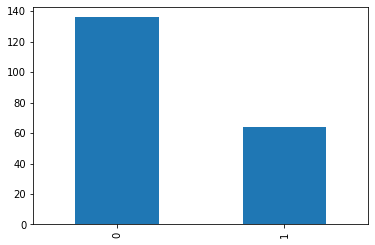

In [27]:
df['DEATH'].value_counts().plot(kind='bar')

In [28]:
df.size

3200

In [29]:
df.shape

(200, 16)

## Algorithms importations

In [30]:
x = df.drop('DEATH', axis=1)
y = df['DEATH']

In [32]:
x = x[['AGE_50', 'MD_50', 'SBP_50']]

In [33]:
x

,AGE_50,MD_50,SBP_50
0,42,1,110
1,53,1,130
2,53,2,120
3,48,4,120
4,53,3,118
...,...,...,...
195,50,1,115
196,23,1,110
197,20,3,130
198,46,3,140


In [34]:
y

0      1
1      1
2      1
3      1
4      1
      ..
195    0
196    0
197    0
198    0
199    0
Name: DEATH, Length: 200, dtype: int64

In [35]:
## Training the model

In [36]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [37]:
## Random Forect Classifier importation

In [38]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)

In [39]:
clf = clf.fit(x_train, y_train)

In [40]:
clf

RandomForestClassifier(n_estimators=10)

In [41]:
y_pred = clf.predict(x_test)

In [42]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1], dtype=int64)

In [43]:
Training_accuracy = clf.score(x_train, y_train)
Test_accuracy = clf.score(x_test, y_test)

In [44]:
Training_accuracy

0.9466666666666667

In [45]:
Test_accuracy

0.62

In [47]:
pd.DataFrame({'actual_DEATH': y_test, 'predicted_DEATH': y_pred})

,actual_DEATH,predicted_DEATH
95,1,0
15,1,1
30,0,0
158,0,1
128,0,0
115,1,0
69,1,1
170,0,0
174,0,0
45,1,0


In [48]:
## confusion matrix

C:\Users\HP\anaconda3\envs\ds_course\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


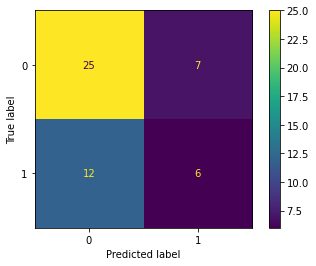

In [49]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, x_test,y_test)

In [50]:
from sklearn.metrics import classification_report

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.78      0.72        32
           1       0.46      0.33      0.39        18

    accuracy                           0.62        50
   macro avg       0.57      0.56      0.56        50
weighted avg       0.60      0.62      0.60        50



In [52]:
## Logistic Regression 

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
Lr_model  = LogisticRegression()

In [55]:
Lr_model

LogisticRegression()

In [56]:
Lr_model.fit(x_train, y_train)

LogisticRegression()

In [57]:
from sklearn.metrics import accuracy_score

training_accuracy = Lr_model.score(x_train,y_train)
test_accuracy =Lr_model.score(x_test,y_test)

In [59]:
print(f'Training accuracy: {training_accuracy}')
print(f'Test accuracy: {test_accuracy}')

Training accuracy: 0.7666666666666667
Test accuracy: 0.68


In [60]:
## Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
tree_model = DecisionTreeClassifier()

In [63]:
tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [64]:
tree_model.score(x_train, y_train)

0.98

In [65]:
from sklearn.metrics import accuracy_score 

In [66]:
tree_model.score(x_test, y_test)

0.58

## Model Deployment with gradio

In [67]:
import gradio as gr

## Model deployment with gradio
- define a function with input as argument and prediction as return value
- define inputs and outputs
- define your app
- launch your app

In [68]:
def predict_DEATH(AGE_50, MD_50, SBP_50):
    x = np.array([AGE_50, MD_50, SBP_50])
    pred = clf.predict(x.reshape(1, -1))
    return pred[0]

In [72]:
AGE_50 = gr.inputs.Number(label='AGE')
MD_50 = gr.inputs.Number(label='MD')
SBP_50 = gr.inputs.Number(label='Systolic Blood Pressure')
output = gr.outputs.Textbox(label='DEATH')

In [73]:
app = gr.Interface(predict_DEATH, inputs=[AGE_50, MD_50, SBP_50], outputs=output, description= 'This is a DEATH Predictor')

In [74]:
app.launch()

Running on local URL:  http://127.0.0.1:7867/

To create a public link, set `share=True` in `launch()`.


(<fastapi.applications.FastAPI at 0x183089f1be0>,
 'http://127.0.0.1:7867/',
 None)

C:\Users\HP\anaconda3\envs\ds_course\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\envs\ds_course\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
